## Urban Growth Prediction Models Comparison - Kurunegala District

This notebook compares different **machine learning and time series models** to predict future urbanization in **Kurunegala District**.

### 🎯 **Objective**
Compare the performance of multiple prediction models and select the best one for forecasting urban growth to 2030.

### 📊 **Models Evaluated**

1. **Prophet** (Facebook's time series forecasting)
   - Handles seasonality and trends automatically
   - Good for irregular intervals
   - Robust to missing data

2. **ARIMA** (AutoRegressive Integrated Moving Average)
   - Classic statistical time series model
   - Good for linear trends
   - Requires stationary data

3. **Random Forest** (Machine Learning Ensemble)
   - Non-linear relationships
   - Feature importance analysis
   - Handles complex patterns

4. **K-Means Clustering** (Pattern Discovery)
   - Identifies growth phases
   - Temporal pattern recognition
   - Exploratory analysis

### 📋 **Prerequisites**
- ✅ Completed urbanization analysis
- ✅ Generated statistics CSV file: `Kurunegala_Urbanization_Stats.csv`
- ✅ Time series data with urban area measurements

### 📈 **Outputs**
- Model performance comparison (MAE, RMSE, R²)
- Best model selection
- Forecast to 2030 with confidence intervals
- Growth rate predictions

         URBAN GROWTH PREDICTION MODELS - KURUNEGALA DISTRICT         

📁 Loading data from: ../..\Processed_Kurunegala_Urban/Kurunegala_Urbanization_Stats.csv
   ✅ Loaded 245 records
   📅 Period: 2013-05-26 to 2024-12-26
   📊 Urban area range: 0.00 - 46.13 km²

📊 DATA SUMMARY:
----------------------------------------------------------------------
   Total observations: 245
   Years covered: 12
   Average scenes per year: 20.4
   Current urban area: 1.80 km²
   Total growth: 1.76 km²

🔄 TRAIN/TEST SPLIT:
----------------------------------------------------------------------
   Training set: 208 observations (2013-05-26 to 2023-08-18)
   Test set: 37 observations (2023-08-26 to 2024-12-26)

               MODEL 1: PROPHET (Facebook Time Series)                
   Training Prophet model...


11:13:11 - cmdstanpy - INFO - Chain [1] start processing
11:13:11 - cmdstanpy - INFO - Chain [1] done processing


   ✅ Prophet Results:
      MAE:  2.767 km²
      RMSE: 3.864 km²
      R²:   -0.333
      MAPE: inf%

               MODEL 2: ARIMA (Statistical Time Series)               
   Training ARIMA(1,1,1) model...
   ✅ ARIMA Results:
      MAE:  2.423 km²
      RMSE: 3.413 km²
      R²:   -0.040
      MAPE: inf%

              MODEL 3: RANDOM FOREST (Machine Learning)               
   Training Random Forest (300 trees)...
   ✅ Random Forest Results:
      MAE:  2.272 km²
      RMSE: 3.547 km²
      R²:   -0.124
      MAPE: inf%

   📊 Feature Importance:
      Days_Since_Start    : 0.572
      Month               : 0.248
      Year                : 0.146
      Quarter             : 0.034

           MODEL 4: K-MEANS CLUSTERING (Pattern Discovery)            
   ✅ Clustering complete

   📊 Cluster Distribution:
      Cluster 0: 170 observations
         Urban area: 0.00 - 3.36 km²
         Period: 2013-05-26 to 2024-12-26
      Cluster 1: 6 observations
         Urban area: 25.42 - 46.13 km²


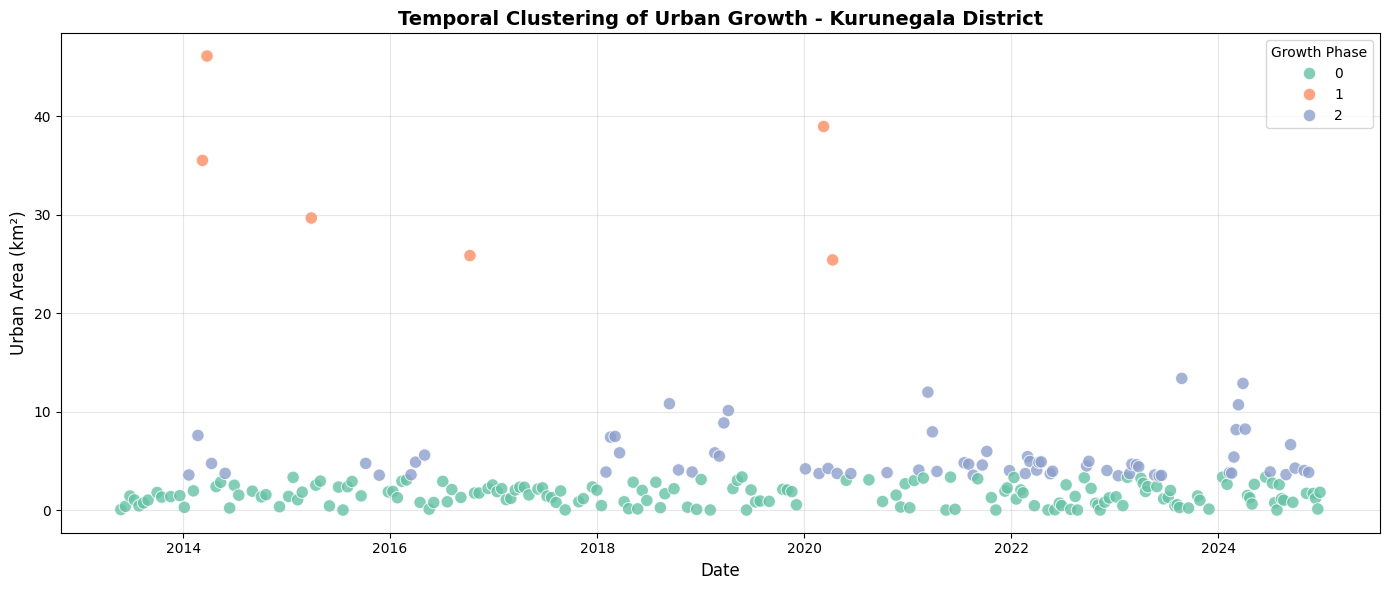

   💾 Cluster data saved

                     MODEL PERFORMANCE COMPARISON                     

        Model  MAE (km²)  RMSE (km²)        R²  MAPE (%)
      Prophet   2.767049    3.863773 -0.333177       inf
        ARIMA   2.423166    3.412781 -0.040115       inf
Random Forest   2.271672    3.547420 -0.123802       inf

🏆 BEST PERFORMING MODEL: ARIMA
   Lowest RMSE: 3.413 km²
   💾 Comparison results saved

📊 Creating forecast comparison visualization...


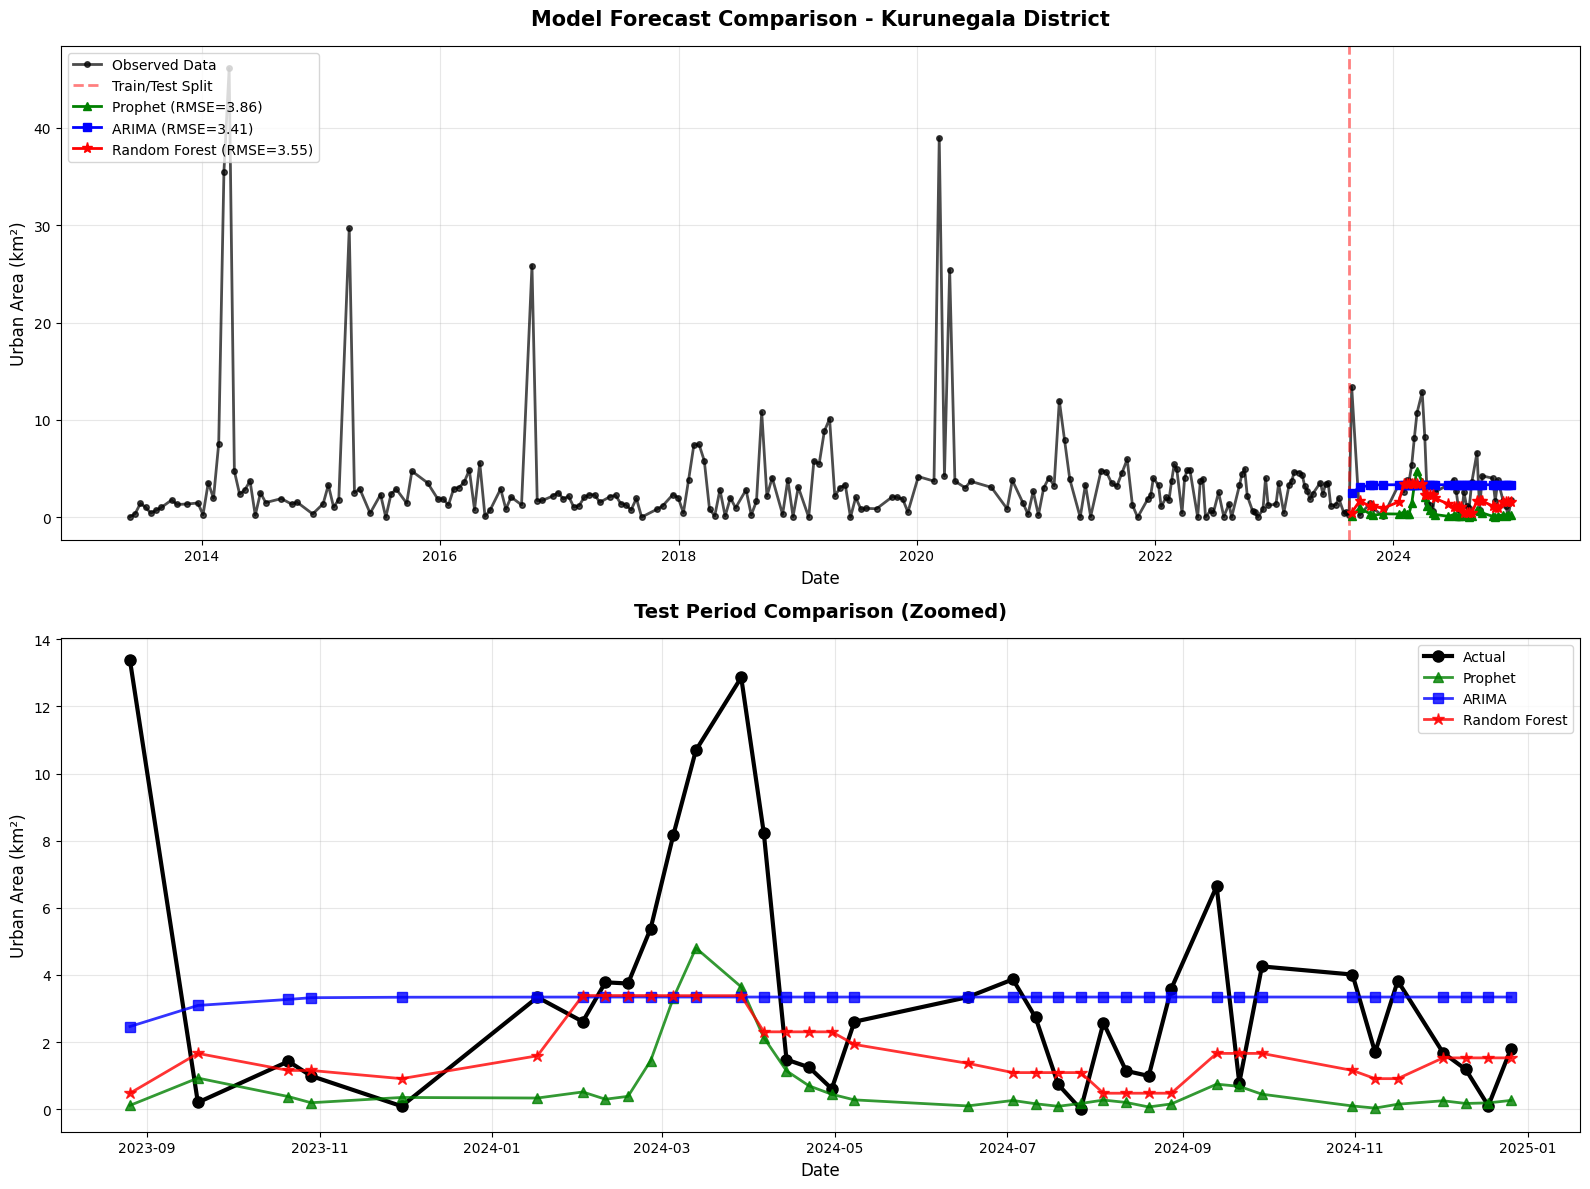

   ✅ Visualization saved

                MODEL TRAINING AND COMPARISON COMPLETE                


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# ===========================
# CONFIGURATION
# ===========================
BASE_DIR = "../.."
STATS_FILE = os.path.join(BASE_DIR, "Processed_Kurunegala_Urban/Kurunegala_Urbanization_Stats.csv")
OUTPUT_DIR = os.path.join(BASE_DIR, "Model_Comparison_Kurunegala")
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("="*70)
print("URBAN GROWTH PREDICTION MODELS - KURUNEGALA DISTRICT".center(70))
print("="*70)

# ===========================
# LOAD DATA
# ===========================
def load_urbanization_data():
    """Load urbanization statistics from analysis"""
    
    if not os.path.exists(STATS_FILE):
        print(f"\n❌ ERROR: Statistics file not found: {STATS_FILE}")
        print("   Please run 'Urbanization Analysis for Kurunegala District.ipynb' first!")
        print("   This will generate the required CSV file.")
        return None
    
    print(f"\n📁 Loading data from: {STATS_FILE}")
    df = pd.read_csv(STATS_FILE, parse_dates=["Date"])
    df = df.sort_values("Date").reset_index(drop=True)
    
    print(f"   ✅ Loaded {len(df)} records")
    print(f"   📅 Period: {df['Date'].min().date()} to {df['Date'].max().date()}")
    print(f"   📊 Urban area range: {df['Urban_Area_km2'].min():.2f} - {df['Urban_Area_km2'].max():.2f} km²")
    
    return df

df = load_urbanization_data()

if df is None:
    print("\n⚠️  Cannot proceed without data.")
    print("   Run the urbanization analysis notebook first, then return here.")
else:
    # ===========================
    # DATA PREPARATION
    # ===========================
    print(f"\n📊 DATA SUMMARY:")
    print("-" * 70)
    print(f"   Total observations: {len(df)}")
    print(f"   Years covered: {df['Date'].dt.year.nunique()}")
    print(f"   Average scenes per year: {len(df) / df['Date'].dt.year.nunique():.1f}")
    print(f"   Current urban area: {df['Urban_Area_km2'].iloc[-1]:.2f} km²")
    print(f"   Total growth: {df['Urban_Area_km2'].iloc[-1] - df['Urban_Area_km2'].iloc[0]:.2f} km²")
    
    # ===========================
    # TRAIN/TEST SPLIT
    # ===========================
    train_size = int(len(df) * 0.85)  # 85% for training, 15% for testing
    train_df = df.iloc[:train_size].copy()
    test_df = df.iloc[train_size:].copy()
    
    y_train = train_df["Urban_Area_km2"]
    y_test = test_df["Urban_Area_km2"]
    X_train_index = train_df["Date"]
    X_test_index = test_df["Date"]
    
    print(f"\n🔄 TRAIN/TEST SPLIT:")
    print("-" * 70)
    print(f"   Training set: {len(train_df)} observations ({train_df['Date'].min().date()} to {train_df['Date'].max().date()})")
    print(f"   Test set: {len(test_df)} observations ({test_df['Date'].min().date()} to {test_df['Date'].max().date()})")
    
    # ===========================
    # MODEL 1: PROPHET
    # ===========================
    print(f"\n" + "="*70)
    print("MODEL 1: PROPHET (Facebook Time Series)".center(70))
    print("="*70)
    
    prophet_df = train_df[["Date", "Urban_Area_km2"]].rename(columns={"Date": "ds", "Urban_Area_km2": "y"})
    
    print("   Training Prophet model...")
    model_prophet = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=0.3,
        seasonality_mode='multiplicative'
    )
    model_prophet.fit(prophet_df)
    
    # Make predictions
    future = pd.DataFrame({'ds': test_df['Date'].values})
    forecast = model_prophet.predict(future)
    prophet_pred = forecast["yhat"].values
    
    # Calculate metrics
    prophet_mae = mean_absolute_error(y_test, prophet_pred)
    prophet_rmse = np.sqrt(mean_squared_error(y_test, prophet_pred))
    prophet_r2 = r2_score(y_test, prophet_pred)
    prophet_mape = np.mean(np.abs((y_test - prophet_pred) / y_test)) * 100
    
    print(f"   ✅ Prophet Results:")
    print(f"      MAE:  {prophet_mae:.3f} km²")
    print(f"      RMSE: {prophet_rmse:.3f} km²")
    print(f"      R²:   {prophet_r2:.3f}")
    print(f"      MAPE: {prophet_mape:.2f}%")
    
    # ===========================
    # MODEL 2: ARIMA
    # ===========================
    print(f"\n" + "="*70)
    print("MODEL 2: ARIMA (Statistical Time Series)".center(70))
    print("="*70)
    
    try:
        print("   Training ARIMA(1,1,1) model...")
        arima_model = ARIMA(y_train, order=(1,1,1))
        arima_fit = arima_model.fit()
        arima_forecast = arima_fit.forecast(steps=len(y_test))
        
        arima_mae = mean_absolute_error(y_test, arima_forecast)
        arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))
        arima_r2 = r2_score(y_test, arima_forecast)
        arima_mape = np.mean(np.abs((y_test - arima_forecast) / y_test)) * 100
        
        print(f"   ✅ ARIMA Results:")
        print(f"      MAE:  {arima_mae:.3f} km²")
        print(f"      RMSE: {arima_rmse:.3f} km²")
        print(f"      R²:   {arima_r2:.3f}")
        print(f"      MAPE: {arima_mape:.2f}%")
        
    except Exception as e:
        print(f"   ⚠️  ARIMA failed: {str(e)}")
        print("   Using simple moving average as fallback...")
        
        window = min(12, len(y_train))
        arima_forecast = np.full(len(y_test), y_train.rolling(window=window).mean().iloc[-1])
        arima_mae = mean_absolute_error(y_test, arima_forecast)
        arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))
        arima_r2 = r2_score(y_test, arima_forecast)
        arima_mape = np.mean(np.abs((y_test - arima_forecast) / y_test)) * 100
        
        print(f"   ✅ Moving Average Results (fallback):")
        print(f"      MAE:  {arima_mae:.3f} km²")
        print(f"      RMSE: {arima_rmse:.3f} km²")
        print(f"      R²:   {arima_r2:.3f}")
        print(f"      MAPE: {arima_mape:.2f}%")
    
    # ===========================
    # MODEL 3: RANDOM FOREST
    # ===========================
    print(f"\n" + "="*70)
    print("MODEL 3: RANDOM FOREST (Machine Learning)".center(70))
    print("="*70)
    
    # Feature engineering
    df["Month"] = df["Date"].dt.month
    df["Year"] = df["Date"].dt.year
    df["Quarter"] = df["Date"].dt.quarter
    df["DayOfYear"] = df["Date"].dt.dayofyear
    df["Days_Since_Start"] = (df["Date"] - df["Date"].min()).dt.days
    
    feature_cols = ["Month", "Year", "Quarter", "Days_Since_Start"]
    
    X = df[feature_cols]
    y = df["Urban_Area_km2"]
    
    X_train_rf = X.iloc[:train_size]
    X_test_rf = X.iloc[train_size:]
    y_train_rf = y.iloc[:train_size]
    y_test_rf = y.iloc[train_size:]
    
    print("   Training Random Forest (300 trees)...")
    rf = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)
    rf.fit(X_train_rf, y_train_rf)
    rf_pred = rf.predict(X_test_rf)
    
    rf_mae = mean_absolute_error(y_test_rf, rf_pred)
    rf_rmse = np.sqrt(mean_squared_error(y_test_rf, rf_pred))
    rf_r2 = r2_score(y_test_rf, rf_pred)
    rf_mape = np.mean(np.abs((y_test_rf - rf_pred) / y_test_rf)) * 100
    
    print(f"   ✅ Random Forest Results:")
    print(f"      MAE:  {rf_mae:.3f} km²")
    print(f"      RMSE: {rf_rmse:.3f} km²")
    print(f"      R²:   {rf_r2:.3f}")
    print(f"      MAPE: {rf_mape:.2f}%")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\n   📊 Feature Importance:")
    for idx, row in feature_importance.iterrows():
        print(f"      {row['Feature']:20s}: {row['Importance']:.3f}")
    
    # ===========================
    # MODEL 4: K-MEANS CLUSTERING
    # ===========================
    print(f"\n" + "="*70)
    print("MODEL 4: K-MEANS CLUSTERING (Pattern Discovery)".center(70))
    print("="*70)
    
    X_scaled = StandardScaler().fit_transform(df[["Urban_Area_km2"]])
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
    df["Cluster"] = kmeans.fit_predict(X_scaled)
    
    print(f"   ✅ Clustering complete")
    print(f"\n   📊 Cluster Distribution:")
    for cluster_id in sorted(df['Cluster'].unique()):
        cluster_data = df[df['Cluster'] == cluster_id]
        print(f"      Cluster {cluster_id}: {len(cluster_data)} observations")
        print(f"         Urban area: {cluster_data['Urban_Area_km2'].min():.2f} - {cluster_data['Urban_Area_km2'].max():.2f} km²")
        print(f"         Period: {cluster_data['Date'].min().date()} to {cluster_data['Date'].max().date()}")
    
    # Visualize clusters
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x="Date", y="Urban_Area_km2", hue="Cluster", palette="Set2", data=df, s=80, alpha=0.8)
    plt.title("Temporal Clustering of Urban Growth - Kurunegala District", fontsize=14, fontweight='bold')
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Urban Area (km²)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(title="Growth Phase", fontsize=10)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "KMeans_Temporal_Clusters.png"), dpi=300)
    plt.show()
    
    # Save cluster data
    df.to_csv(os.path.join(OUTPUT_DIR, "Kurunegala_Clusters.csv"), index=False)
    print(f"   💾 Cluster data saved")
    
    # ===========================
    # MODEL COMPARISON
    # ===========================
    print(f"\n" + "="*70)
    print("MODEL PERFORMANCE COMPARISON".center(70))
    print("="*70)
    
    results = pd.DataFrame({
        "Model": ["Prophet", "ARIMA", "Random Forest"],
        "MAE (km²)": [prophet_mae, arima_mae, rf_mae],
        "RMSE (km²)": [prophet_rmse, arima_rmse, rf_rmse],
        "R²": [prophet_r2, arima_r2, rf_r2],
        "MAPE (%)": [prophet_mape, arima_mape, rf_mape]
    })
    
    print(f"\n{results.to_string(index=False)}")
    
    # Identify best model
    best_model_idx = results["RMSE (km²)"].idxmin()
    best_model = results.loc[best_model_idx, "Model"]
    best_rmse = results.loc[best_model_idx, "RMSE (km²)"]
    
    print(f"\n🏆 BEST PERFORMING MODEL: {best_model}")
    print(f"   Lowest RMSE: {best_rmse:.3f} km²")
    
    # Save comparison results
    results.to_csv(os.path.join(OUTPUT_DIR, "Model_Comparison_Results.csv"), index=False)
    print(f"   💾 Comparison results saved")
    
    # ===========================
    # VISUALIZATION: FORECAST COMPARISON
    # ===========================
    print(f"\n📊 Creating forecast comparison visualization...")
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
    
    # Plot 1: Full timeline
    ax1.plot(df["Date"], df["Urban_Area_km2"], 'ko-', label="Observed Data", linewidth=2, markersize=4, alpha=0.7)
    ax1.axvline(x=train_df['Date'].max(), color='red', linestyle='--', alpha=0.5, linewidth=2, label='Train/Test Split')
    ax1.plot(X_test_index, prophet_pred, 'g^-', label=f"Prophet (RMSE={prophet_rmse:.2f})", linewidth=2, markersize=6)
    ax1.plot(X_test_index, arima_forecast, 'bs-', label=f"ARIMA (RMSE={arima_rmse:.2f})", linewidth=2, markersize=6)
    ax1.plot(X_test_index, rf_pred, 'r*-', label=f"Random Forest (RMSE={rf_rmse:.2f})", linewidth=2, markersize=8)
    
    ax1.set_title("Model Forecast Comparison - Kurunegala District", fontsize=15, fontweight='bold', pad=15)
    ax1.set_xlabel("Date", fontsize=12)
    ax1.set_ylabel("Urban Area (km²)", fontsize=12)
    ax1.legend(fontsize=10, loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Zoomed in on test period
    ax2.plot(X_test_index, y_test, 'ko-', label="Actual", linewidth=3, markersize=8)
    ax2.plot(X_test_index, prophet_pred, 'g^-', label=f"Prophet", linewidth=2, markersize=7, alpha=0.8)
    ax2.plot(X_test_index, arima_forecast, 'bs-', label=f"ARIMA", linewidth=2, markersize=7, alpha=0.8)
    ax2.plot(X_test_index, rf_pred, 'r*-', label=f"Random Forest", linewidth=2, markersize=9, alpha=0.8)
    
    ax2.set_title("Test Period Comparison (Zoomed)", fontsize=14, fontweight='bold', pad=15)
    ax2.set_xlabel("Date", fontsize=12)
    ax2.set_ylabel("Urban Area (km²)", fontsize=12)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "Model_Forecast_Comparison.png"), dpi=300, bbox_inches='tight')
    plt.show()
    
    print("   ✅ Visualization saved")
    
    print(f"\n" + "="*70)
    print("MODEL TRAINING AND COMPARISON COMPLETE".center(70))
    print("="*70)

11:13:15 - cmdstanpy - INFO - Chain [1] start processing


            FUTURE URBAN GROWTH PREDICTIONS - 2026 TO 2030            

🔄 Retraining Prophet model with complete dataset...


11:13:15 - cmdstanpy - INFO - Chain [1] done processing


   ✅ Model trained

📅 Generating predictions:
   Last observation: 2024-12-26
   Prediction horizon: 5 years (60 months)
   Target end date: 2030

   💾 Forecast saved: Kurunegala_Forecast_2026_2030.csv

                     GROWTH PROJECTIONS ANALYSIS                      

📊 BASELINE (Current Situation):
   Date: 2024-12-26
   Urban Area: 1.80 km²

🔮 PREDICTION FOR 2030:
   Predicted Urban Area: 3.24 km²
   Confidence Interval: -4.01 - 11.09 km²
   Uncertainty Range: ±7.55 km²

📈 GROWTH ANALYSIS:
   Absolute Growth: 1.44 km²
   Percentage Growth: 79.77%
   Annual Growth Rate: 15.95% per year
   Average Annual Increase: 0.29 km²/year

📅 YEAR-BY-YEAR PROJECTIONS:
----------------------------------------------------------------------
Year       Urban Area (km²)     Growth from Previous (km²) % Change       
----------------------------------------------------------------------
2025       3.57                 1.76                      97.84          %
2026       4.76                 1.19 

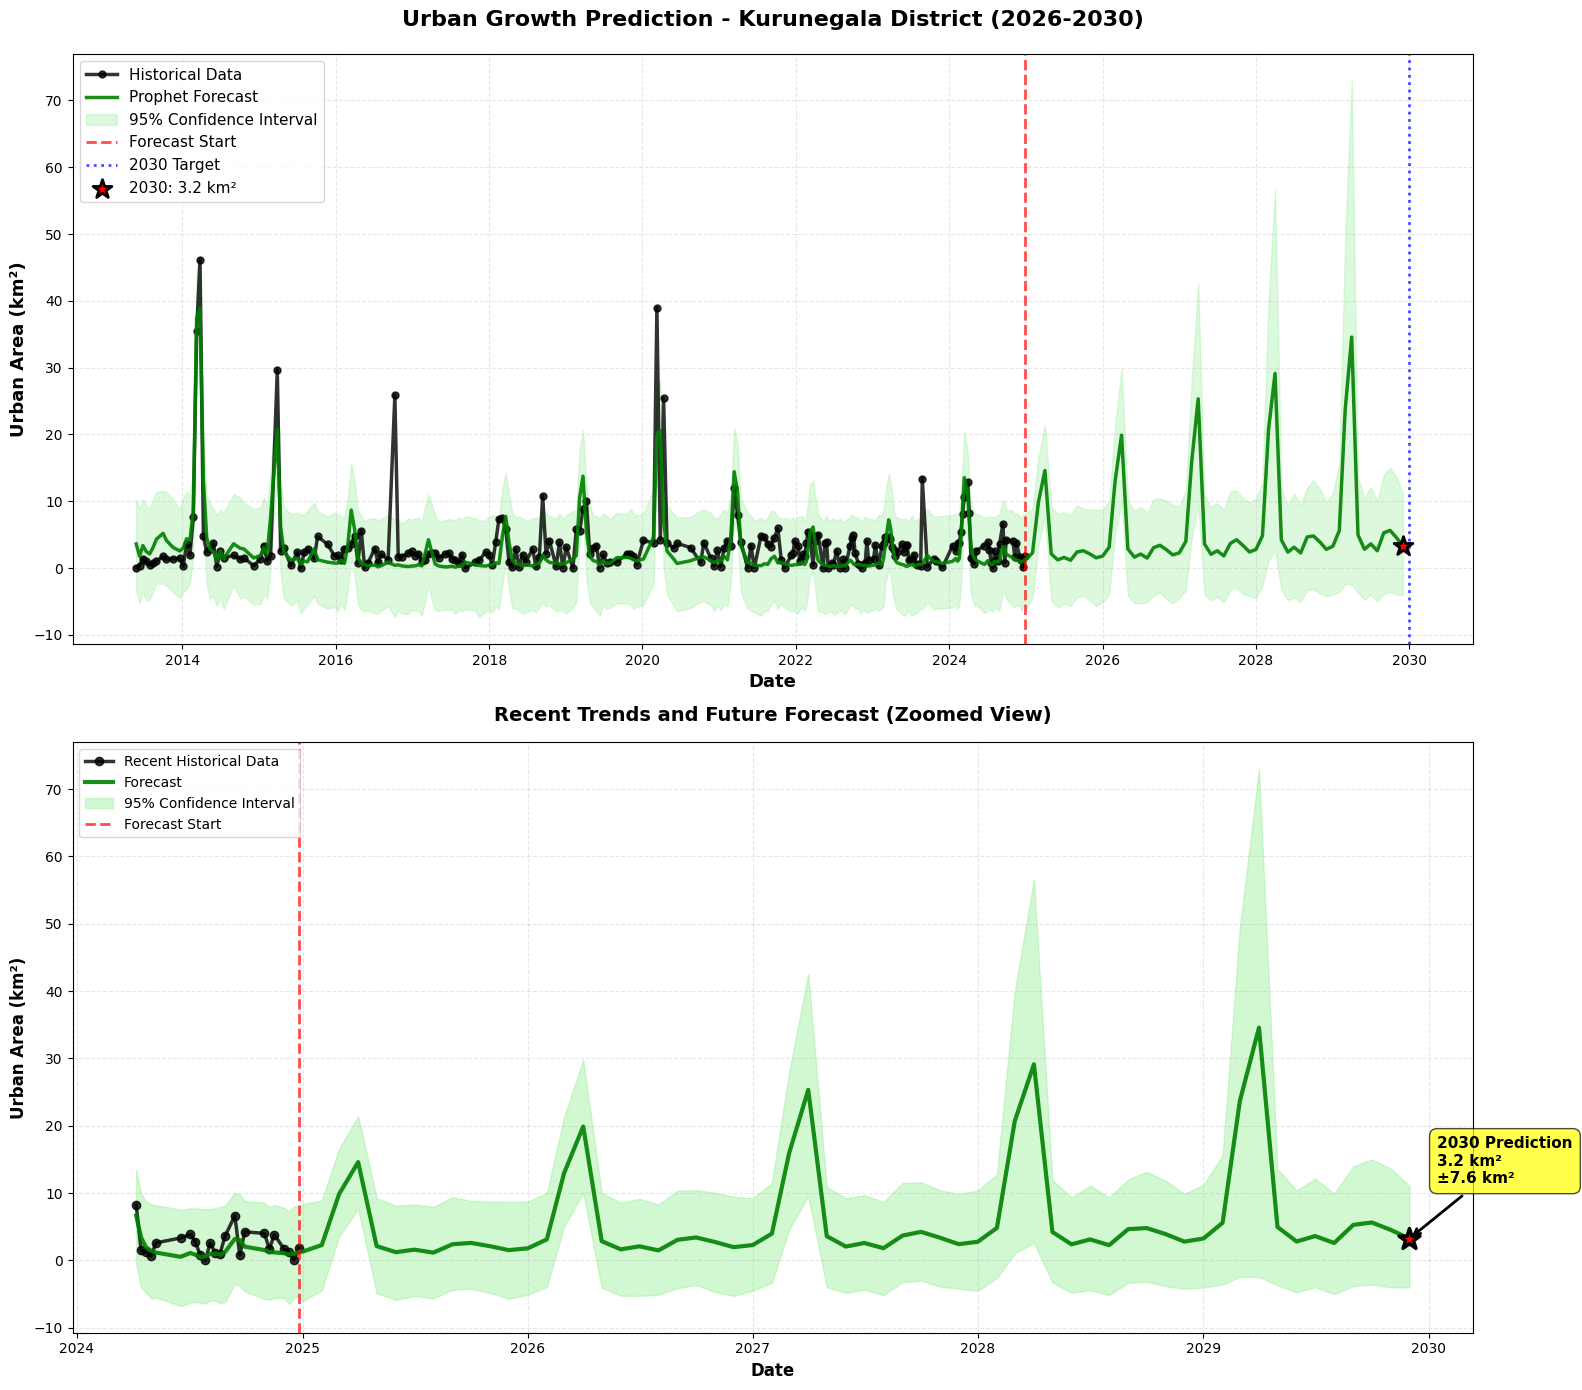

   ✅ Visualization saved

                     URBAN PLANNING IMPLICATIONS                      

🏗️ INFRASTRUCTURE REQUIREMENTS:
   • Additional urban land needed: 1.44 km²
   • Equivalent to: 144 hectares
   • That's approximately 1599 residential plots (30m x 30m)

📊 DEVELOPMENT PRESSURE:
   • Annual expansion rate: 15.95% per year
   • Average new urban area per year: 0.29 km²
   • By 2030, urbanization will increase by 79.8% from current levels

⚠️ PLANNING CONSIDERATIONS:
   • Infrastructure capacity planning for 3.2 km² urban area
   • Transportation network expansion required
   • Water and sanitation services for growing population
   • Environmental impact assessment for 1.44 km² development

🌳 SUSTAINABILITY RECOMMENDATIONS:
   • Reserve 0.22 km² for green spaces (15% of new development)
   • Plan mixed-use developments to reduce sprawl
   • Implement smart growth principles
   • Consider climate resilience in new infrastructure

📈 CONFIDENCE ANALYSIS:
   • Best case scenari

In [2]:
# ===========================
# FUTURE PREDICTIONS (2026-2030)
# ===========================

if df is not None:
    print("="*70)
    print("FUTURE URBAN GROWTH PREDICTIONS - 2026 TO 2030".center(70))
    print("="*70)
    
    # Retrain Prophet with full dataset
    print("\n🔄 Retraining Prophet model with complete dataset...")
    prophet_full_df = df[["Date", "Urban_Area_km2"]].rename(columns={"Date": "ds", "Urban_Area_km2": "y"})
    
    final_model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        changepoint_prior_scale=0.3,
        seasonality_mode='multiplicative',
        interval_width=0.95  # 95% confidence interval
    )
    final_model.fit(prophet_full_df)
    print("   ✅ Model trained")
    
    # Calculate prediction horizon
    last_date = df['Date'].max()
    years_to_predict = 5  # 2026-2030
    
    # Determine frequency based on data density
    avg_days_between = (df['Date'].diff().mean().days)
    if avg_days_between < 40:  # Monthly-ish data
        freq = 'MS'  # Month start
        periods = years_to_predict * 12
        period_name = "months"
    else:  # Yearly or sparse data
        freq = 'YS'  # Year start
        periods = years_to_predict
        period_name = "years"
    
    print(f"\n📅 Generating predictions:")
    print(f"   Last observation: {last_date.date()}")
    print(f"   Prediction horizon: {years_to_predict} years ({periods} {period_name})")
    print(f"   Target end date: 2030")
    
    # Create future dataframe
    future_full = final_model.make_future_dataframe(periods=periods, freq=freq)
    future_forecast = final_model.predict(future_full)
    
    # Extract future predictions only
    future_only = future_forecast[future_forecast['ds'] > last_date].copy()
    
    # Save forecast results
    forecast_output = future_only[["ds", "yhat", "yhat_lower", "yhat_upper"]].copy()
    forecast_output.columns = ["Date", "Predicted_Urban_km2", "Lower_Bound_km2", "Upper_Bound_km2"]
    forecast_output.to_csv(os.path.join(OUTPUT_DIR, "Kurunegala_Forecast_2026_2030.csv"), index=False)
    print(f"\n   💾 Forecast saved: Kurunegala_Forecast_2026_2030.csv")
    
    # ===========================
    # GROWTH STATISTICS
    # ===========================
    print(f"\n" + "="*70)
    print("GROWTH PROJECTIONS ANALYSIS".center(70))
    print("="*70)
    
    last_known_area = prophet_full_df["y"].iloc[-1]
    last_known_date = prophet_full_df["ds"].iloc[-1]
    
    # Get 2030 prediction (or closest)
    prediction_2030 = future_forecast[future_forecast['ds'].dt.year == 2030]
    if len(prediction_2030) == 0:
        prediction_2030 = future_forecast.iloc[-1]
    else:
        prediction_2030 = prediction_2030.iloc[-1]
    
    predicted_2030_area = prediction_2030['yhat']
    lower_bound_2030 = prediction_2030['yhat_lower']
    upper_bound_2030 = prediction_2030['yhat_upper']
    
    total_growth = predicted_2030_area - last_known_area
    growth_rate_pct = (total_growth / last_known_area) * 100
    annual_growth_rate = growth_rate_pct / years_to_predict
    
    print(f"\n📊 BASELINE (Current Situation):")
    print(f"   Date: {last_known_date.date()}")
    print(f"   Urban Area: {last_known_area:.2f} km²")
    
    print(f"\n🔮 PREDICTION FOR 2030:")
    print(f"   Predicted Urban Area: {predicted_2030_area:.2f} km²")
    print(f"   Confidence Interval: {lower_bound_2030:.2f} - {upper_bound_2030:.2f} km²")
    print(f"   Uncertainty Range: ±{(upper_bound_2030 - lower_bound_2030) / 2:.2f} km²")
    
    print(f"\n📈 GROWTH ANALYSIS:")
    print(f"   Absolute Growth: {total_growth:.2f} km²")
    print(f"   Percentage Growth: {growth_rate_pct:.2f}%")
    print(f"   Annual Growth Rate: {annual_growth_rate:.2f}% per year")
    print(f"   Average Annual Increase: {total_growth / years_to_predict:.2f} km²/year")
    
    # Year-by-year breakdown
    print(f"\n📅 YEAR-BY-YEAR PROJECTIONS:")
    print("-" * 70)
    print(f"{'Year':<10} {'Urban Area (km²)':<20} {'Growth from Previous (km²)':<25} {'% Change':<15}")
    print("-" * 70)
    
    prev_area = last_known_area
    for year in range(last_date.year + 1, 2031):
        year_pred = future_forecast[future_forecast['ds'].dt.year == year]
        if len(year_pred) > 0:
            # Use mean if multiple predictions per year
            year_area = year_pred['yhat'].mean()
            year_growth = year_area - prev_area
            year_pct = (year_growth / prev_area) * 100
            print(f"{year:<10} {year_area:<20.2f} {year_growth:<25.2f} {year_pct:<15.2f}%")
            prev_area = year_area
    
    # ===========================
    # VISUALIZATION
    # ===========================
    print(f"\n📊 Creating future predictions visualization...")
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14))
    
    # Plot 1: Full timeline with predictions
    ax1.plot(prophet_full_df["ds"], prophet_full_df["y"], 'ko-', 
             label="Historical Data", linewidth=2.5, markersize=5, alpha=0.8)
    ax1.plot(future_forecast["ds"], future_forecast["yhat"], 'g-', 
             linewidth=2.5, label="Prophet Forecast", alpha=0.9)
    ax1.fill_between(
        future_forecast["ds"],
        future_forecast["yhat_lower"],
        future_forecast["yhat_upper"],
        color="lightgreen",
        alpha=0.3,
        label="95% Confidence Interval"
    )
    ax1.axvline(x=last_date, color="red", linestyle="--", linewidth=2, alpha=0.7, label="Forecast Start")
    
    # Add 2030 marker
    ax1.axvline(x=pd.Timestamp('2030-01-01'), color="blue", linestyle=":", linewidth=2, alpha=0.7, label="2030 Target")
    ax1.scatter([prediction_2030['ds']], [predicted_2030_area], color='red', s=200, zorder=5, 
                marker='*', edgecolors='black', linewidth=2, label=f'2030: {predicted_2030_area:.1f} km²')
    
    ax1.set_title("Urban Growth Prediction - Kurunegala District (2026-2030)", 
                  fontsize=16, fontweight="bold", pad=20)
    ax1.set_xlabel("Date", fontsize=13, fontweight='bold')
    ax1.set_ylabel("Urban Area (km²)", fontsize=13, fontweight='bold')
    ax1.legend(fontsize=11, loc='upper left')
    ax1.grid(True, alpha=0.3, linestyle='--')
    
    # Plot 2: Zoomed in on future predictions
    future_start_idx = len(prophet_full_df) - 24 if len(prophet_full_df) > 24 else 0
    recent_and_future = future_forecast[future_start_idx:]
    
    ax2.plot(prophet_full_df["ds"].iloc[future_start_idx:], 
             prophet_full_df["y"].iloc[future_start_idx:], 
             'ko-', label="Recent Historical Data", linewidth=2.5, markersize=6, alpha=0.8)
    ax2.plot(recent_and_future["ds"], recent_and_future["yhat"], 'g-', 
             linewidth=3, label="Forecast", alpha=0.9)
    ax2.fill_between(
        recent_and_future["ds"],
        recent_and_future["yhat_lower"],
        recent_and_future["yhat_upper"],
        color="lightgreen",
        alpha=0.4,
        label="95% Confidence Interval"
    )
    ax2.axvline(x=last_date, color="red", linestyle="--", linewidth=2, alpha=0.7, label="Forecast Start")
    ax2.scatter([prediction_2030['ds']], [predicted_2030_area], color='red', s=250, zorder=5, 
                marker='*', edgecolors='black', linewidth=2.5)
    
    # Add annotation for 2030 prediction
    ax2.annotate(f'2030 Prediction\n{predicted_2030_area:.1f} km²\n±{(upper_bound_2030 - lower_bound_2030) / 2:.1f} km²',
                xy=(prediction_2030['ds'], predicted_2030_area),
                xytext=(20, 40), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=2),
                fontsize=11, fontweight='bold')
    
    ax2.set_title("Recent Trends and Future Forecast (Zoomed View)", 
                  fontsize=14, fontweight='bold', pad=15)
    ax2.set_xlabel("Date", fontsize=12, fontweight='bold')
    ax2.set_ylabel("Urban Area (km²)", fontsize=12, fontweight='bold')
    ax2.legend(fontsize=10, loc='upper left')
    ax2.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "Kurunegala_Urbanization_Forecast_2026_2030.png"), 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print("   ✅ Visualization saved")
    
    # ===========================
    # PLANNING IMPLICATIONS
    # ===========================
    print(f"\n" + "="*70)
    print("URBAN PLANNING IMPLICATIONS".center(70))
    print("="*70)
    
    print(f"""
🏗️ INFRASTRUCTURE REQUIREMENTS:
   • Additional urban land needed: {total_growth:.2f} km²
   • Equivalent to: {total_growth * 100:.0f} hectares
   • That's approximately {total_growth * 1000000 / 900:.0f} residential plots (30m x 30m)

📊 DEVELOPMENT PRESSURE:
   • Annual expansion rate: {annual_growth_rate:.2f}% per year
   • Average new urban area per year: {total_growth / years_to_predict:.2f} km²
   • By 2030, urbanization will increase by {growth_rate_pct:.1f}% from current levels

⚠️ PLANNING CONSIDERATIONS:
   • Infrastructure capacity planning for {predicted_2030_area:.1f} km² urban area
   • Transportation network expansion required
   • Water and sanitation services for growing population
   • Environmental impact assessment for {total_growth:.2f} km² development

🌳 SUSTAINABILITY RECOMMENDATIONS:
   • Reserve {total_growth * 0.15:.2f} km² for green spaces (15% of new development)
   • Plan mixed-use developments to reduce sprawl
   • Implement smart growth principles
   • Consider climate resilience in new infrastructure

📈 CONFIDENCE ANALYSIS:
   • Best case scenario (upper bound): {upper_bound_2030:.2f} km²
   • Worst case scenario (lower bound): {lower_bound_2030:.2f} km²
   • Uncertainty range: {upper_bound_2030 - lower_bound_2030:.2f} km²
   • Planning should account for ±{((upper_bound_2030 - lower_bound_2030) / 2 / predicted_2030_area) * 100:.1f}% variation
""")
    
    print("="*70)
    print("✅ FUTURE PREDICTIONS ANALYSIS COMPLETE!".center(70))
    print("="*70)
    print(f"\n📁 All results saved to: {OUTPUT_DIR}")
    print("\n📄 Generated Files:")
    print("   • Kurunegala_Forecast_2026_2030.csv - Year-by-year predictions")
    print("   • Kurunegala_Urbanization_Forecast_2026_2030.png - Visual forecast")
    print("   • Model_Comparison_Results.csv - Model performance metrics")
    print("   • Kurunegala_Clusters.csv - Growth phase clusters")
    print("="*70)
else:
    print("\n⚠️  Skipping future predictions - no data available")